In [62]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [63]:
# define path and read file
game_path = "csvfiles/game.csv"
game = pd.read_csv(game_path)

In [83]:
# create dataframe to call data from
rating_df = game.groupby(["name"])["rating"].unique()
metacritic_df = game.groupby(["name"])["metacritic score"].unique()
rating_metacritic_df = pd.merge(rating_df, metacritic_df, on=["name"], how="left")
rating_metacritic_df['rating'] = rating_metacritic_df['rating'].astype(float)
rating_metacritic_df['metacritic score'] = rating_metacritic_df['metacritic score'].astype(float)
rating_metacritic_df

,rating,metacritic score
name,,
0RBITALIS,3.00,73.0
12 is Better Than 6,3.45,66.0
1979 Revolution: Black Friday,3.54,80.0
428: Shibuya Scramble,4.44,85.0
7th Sector,3.92,74.0
...,...,...
Zero Escape: Zero Time Dilemma,4.06,78.0
Zombie Army Trilogy,3.30,72.0
Zombie Night Terror,3.37,81.0


In [84]:
# quartiles, outliers and interquartile range for user rating
rating = rating_metacritic_df["rating"]

rating_output =[]
rating_quartiles = rating.quantile([0.25, 0.5, 0.75])

rating_lowerq = rating_quartiles[0.25]
rating_upperq = rating_quartiles[0.75]
rating_iqr = rating_upperq-rating_lowerq
rating_lowerbound = rating_lowerq - (1.5*rating_iqr)
rating_upperbound = rating_upperq + (1.5*rating_iqr)

rating_outlier_count =  rating_metacritic_df.loc[(rating_metacritic_df["rating"] > rating_upperbound)|
                                   (rating_metacritic_df["rating"] < rating_lowerbound)
                               ]["rating"].count()
rating_outlier_vol = rating_metacritic_df.loc[(rating_metacritic_df["rating"] > rating_upperbound)|
                                (rating_metacritic_df["rating"] < rating_lowerbound)
                               ]["rating"].sum()

rating_output.append({"Lower Quartile":rating_lowerq, "Median":rating_quartiles[0.5], "Upper Quartile":rating_upperq, 
               "InterQuartile":rating_iqr, "Lower Bound":rating_lowerbound, "Upper Bound":rating_upperbound, "No. of Outliers":rating_outlier_count})

rating_output_df = pd.DataFrame(rating_output)

rating_output_df['Lower Quartile'] = rating_output_df['Lower Quartile'].map("{:,.2f}".format)
rating_output_df['Median'] = rating_output_df['Median'].map("{:,.2f}".format)
rating_output_df['Upper Quartile'] = rating_output_df['Upper Quartile'].map("{:,.2f}".format)
rating_output_df['InterQuartile'] = rating_output_df['InterQuartile'].map("{:,.2f}".format)
rating_output_df['Lower Bound'] = rating_output_df['Lower Bound'].map("{:,.2f}".format)
rating_output_df['Upper Bound'] = rating_output_df['Upper Bound'].map("{:,.2f}".format)
rating_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,3.19,3.57,3.99,0.80,1.99,5.19,9


In [85]:
# quartiles, outliers and interquartile range for meracritic score
metascore = rating_metacritic_df["metacritic score"]

metascore_output =[] 
metascore_quartiles = metascore.quantile([0.25, 0.5, 0.75])

metascore_lowerq = metascore_quartiles[0.25]
metascore_upperq = metascore_quartiles[0.75]
metascore_iqr = metascore_upperq-metascore_lowerq
metascore_lowerbound = metascore_lowerq - (1.5*metascore_iqr)
metascore_upperbound = metascore_upperq + (1.5*metascore_iqr)

metascore_outlier_count =  rating_metacritic_df.loc[(rating_metacritic_df["metacritic score"] > metascore_upperbound)|
                                   (rating_metacritic_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].count()
metascore_outlier_vol = rating_metacritic_df.loc[(rating_metacritic_df["metacritic score"] > metascore_upperbound)|
                                (rating_metacritic_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].sum()

metascore_output.append({"Lower Quartile":metascore_lowerq, "Median":metascore_quartiles[0.5], "Upper Quartile":metascore_upperq, 
               "InterQuartile":metascore_iqr, "Lower Bound":metascore_lowerbound, "Upper Bound":metascore_upperbound, "No. of Outliers":metascore_outlier_count})

metascore_output_df = pd.DataFrame(metascore_output)

metascore_output_df['Lower Quartile'] = metascore_output_df['Lower Quartile'].map("{:,.2f}".format)
metascore_output_df['Median'] = metascore_output_df['Median'].map("{:,.2f}".format)
metascore_output_df['Upper Quartile'] = metascore_output_df['Upper Quartile'].map("{:,.2f}".format)
metascore_output_df['InterQuartile'] = metascore_output_df['InterQuartile'].map("{:,.2f}".format)
metascore_output_df['Lower Bound'] = metascore_output_df['Lower Bound'].map("{:,.2f}".format)
metascore_output_df['Upper Bound'] = metascore_output_df['Upper Bound'].map("{:,.2f}".format)
metascore_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,70.00,76.00,81.00,11.00,53.50,97.50,27


Correlation coefficient is 0.61
Linear regression model is y = 10.25x + 38.6


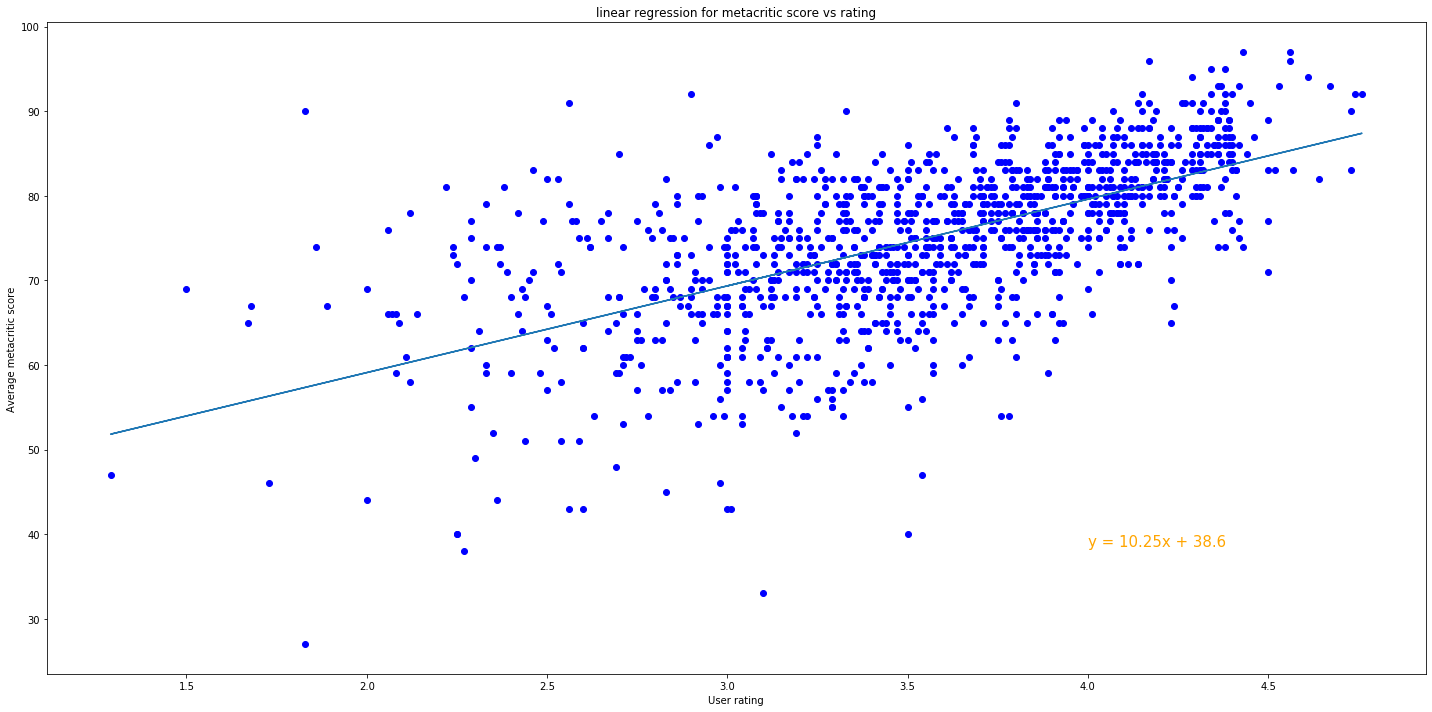

In [95]:
# user rating VS metacritic score
mean_rating = rating_metacritic_df.groupby(["name"])["rating"].mean()
mean_metascore = rating_metacritic_df.groupby(["name"])["metacritic score"].mean()

slope, intercept, rvalue, pvalue, stderror = st.linregress(mean_rating, mean_metascore)
linear = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Correlation coefficient is {round(rvalue,2)}")
print(f"Linear regression model is {linear}")

regression = mean_rating*slope + intercept
plt.figure(figsize=(20,10))
plt.annotate(linear, (4,38.6), fontsize=15, color="orange")
plt.scatter(mean_rating, mean_metascore, color='blue')
plt.plot(mean_rating, regression)
plt.title("linear regression for metacritic score vs rating")
plt.xlabel("User rating")
plt.ylabel("Average metacritic score")
plt.tight_layout()